# Unzip the data

In [1]:
# variables 
# zip_file_path = '/content/drive/MyDrive/masters/second semester/advance topic in machine learning/archive.zip'
# destination_path = 'brain_tumor_images'
# input_path = 'brain_tumor_images/archive/segmentation/'
# model_path = 'unet.hdf5'
# train_result_file_path = 'train_history_info.csv'
# test_result_file_path = 'test_history_info.csv'
# loss_img = 'loss_function.png'
# dsc_img = 'dice_coeff.png'
# iou_img = 'jaccard_coeff.png'



# variables 
zip_file_path = "/content/drive/MyDrive/advance topic in ml/archive.zip"
destination_path = '/content/brain_tumor_images'
input_path = 'brain_tumor_images/archive/segmentation/'
model_path = '/content/drive/MyDrive/advance topic in ml/may_2_unet.hdf5'
train_result_file_path = '/content/drive/MyDrive/advance topic in ml/may_2_loss_function_train.csv'
test_result_file_path = '/content/drive/MyDrive/advance topic in ml/may_2_loss_function_test.csv'
loss_img = '/content/drive/MyDrive/advance topic in ml/may_2_loss_function.png'
dsc_img = '/content/drive/MyDrive/advance topic in ml/may_2_dice_coeff.png'
iou_img = '/content/drive/MyDrive/advance topic in ml/may_2_iou.png'



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_path = zip_file_path
zip_object = zipfile.ZipFile(zip_path)
zip_object.extractall(destination_path)
zip_object.close()

In [4]:
# setting size parameter of images
im_width = 256
im_height = 256
channel = 3

# Loading data from directory and separating actual brain images and masked images

In [5]:
from glob import glob


input_path = input_path

image_filenames_train = []
mask_files = glob(input_path+'*/*_mask*')

for i in mask_files:
    image_filenames_train.append(i.replace('_mask', ''))

print(image_filenames_train[:10])
len(image_filenames_train)

['brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_8.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_10.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_14.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_21.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_3.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_12.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_15.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_6.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_34.tif', 'brain_tumor_images/archive/segmentation/TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_31.tif']


3929

# Contains plotting images and dice and IoU calculating functions

In [6]:


import matplotlib.image as mpimg

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import matplotlib.image as mpimg
import cv2
from tensorflow.keras import backend as K
from skimage.color import rgb2gray
from skimage.io import imread, imshow, concatenate_images


def plot_from_train_image(rows, columns, list_img_path):
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, rows * columns + 1):
        fig.add_subplot(rows, columns, i)
        img_path = list_img_path[i]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
#         mpimg.imsave('my_image_copy.png', image)

def plot_from_mask_image(rows, columns, list_mask_path):
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, rows * columns + 1):
        fig.add_subplot(rows, columns, i)
        img_path = list_mask_path[i]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)

def plot_from_img(rows, columns, list_img_path, list_mask_path):
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, rows * columns + 1):
        fig.add_subplot(rows, columns, i)
        img_path = list_img_path[i]
        mask_path = list_mask_path[i]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path)
        plt.imshow(image)
        plt.imshow(mask, alpha=0.4)
        # mpimg.imsave('my_image_copy.png', image)
        

def dice_coefficients(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)


def dice_coefficients_loss(y_true, y_pred, smooth=100):
    return -dice_coefficients(y_true, y_pred, smooth)


def iou(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou


def jaccard_distance(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    return -iou(y_true_flatten, y_pred_flatten)


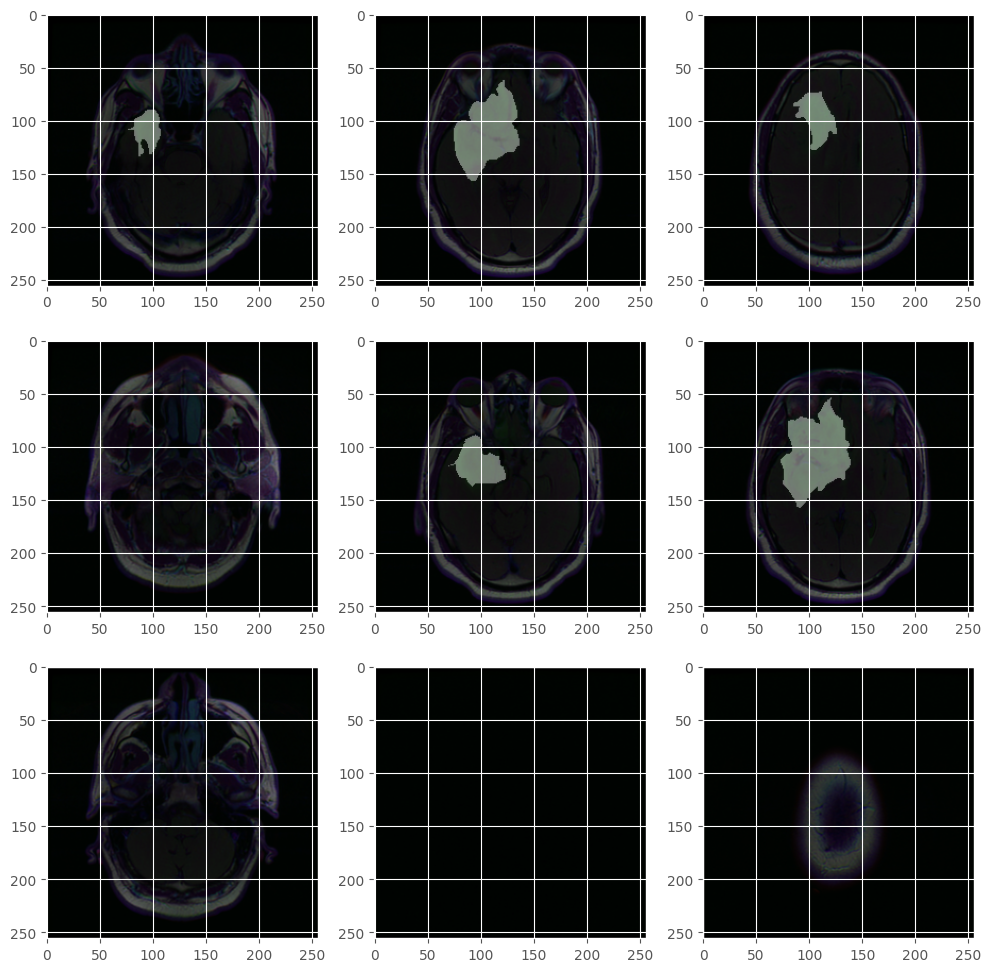

In [7]:
plot_from_img(3,3, image_filenames_train, mask_files)

# Splitting train, test and validation data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.DataFrame(data={'image_filenames_train': image_filenames_train, 'mask': mask_files })
# shuffle the DataFrame
df = df.sample(frac=1)
df = df.reset_index(drop=True)

df_train, df_test = train_test_split(df, test_size=0.3)

# validation dataset
df_test, df_val = train_test_split(df_test, test_size=0.5)


print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(2750, 2)
(589, 2)
(590, 2)


# Creating U-Net Model

In [9]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import (
    Input,
    Activation,
    BatchNormalization,
    Dropout,
    Lambda,
    Conv2D,
    Conv2DTranspose,
    MaxPooling2D,
    concatenate,
)
from tensorflow.keras import backend as K


def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # First DownConvolution / Encoder Leg will begin, so start with Conv2D
    conv1 = Conv2D(filters=48, kernel_size=(3, 3), padding="same")(inputs)
    bn1 = Activation("relu")(conv1)
    conv1 = Conv2D(filters=48, kernel_size=(3, 3), padding="same")(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation("relu")(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(filters=96, kernel_size=(3, 3), padding="same")(pool1)
    bn2 = Activation("relu")(conv2)
    conv2 = Conv2D(filters=96, kernel_size=(3, 3), padding="same")(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation("relu")(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(filters=192, kernel_size=(3, 3), padding="same")(pool2)
    bn3 = Activation("relu")(conv3)
    conv3 = Conv2D(filters=192, kernel_size=(3, 3), padding="same")(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation("relu")(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(filters=384, kernel_size=(3, 3), padding="same")(pool3)
    bn4 = Activation("relu")(conv4)
    conv4 = Conv2D(filters=384, kernel_size=(3, 3), padding="same")(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation("relu")(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(filters=768, kernel_size=(3, 3), padding="same")(pool4)
    bn5 = Activation("relu")(conv5)
    conv5 = Conv2D(filters=768, kernel_size=(3, 3), padding="same")(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation("relu")(bn5)

    """ Now UpConvolution / Decoder Leg will begin, so start with Conv2DTranspose
    The gray arrows (in the above image) indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training. """
    up6 = concatenate(
        [
            Conv2DTranspose(384, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn5
            ),
            conv4,
        ],
        axis=3,
    )
    """ After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output """
    conv6 = Conv2D(filters=384, kernel_size=(3, 3), padding="same")(up6)
    bn6 = Activation("relu")(conv6)
    conv6 = Conv2D(filters=384, kernel_size=(3, 3), padding="same")(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation("relu")(bn6)

    up7 = concatenate(
        [
            Conv2DTranspose(192, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn6
            ),
            conv3,
        ],
        axis=3,
    )
    conv7 = Conv2D(filters=192, kernel_size=(3, 3), padding="same")(up7)
    bn7 = Activation("relu")(conv7)
    conv7 = Conv2D(filters=192, kernel_size=(3, 3), padding="same")(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation("relu")(bn7)

    up8 = concatenate(
        [
            Conv2DTranspose(96, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn7
            ),
            conv2,
        ],
        axis=3,
    )
    conv8 = Conv2D(filters=96, kernel_size=(3, 3), padding="same")(up8)
    bn8 = Activation("relu")(conv8)
    conv8 = Conv2D(filters=96, kernel_size=(3, 3), padding="same")(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation("relu")(bn8)

    up9 = concatenate(
        [
            Conv2DTranspose(48, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn8
            ),
            conv1,
        ],
        axis=3,
    )
    conv9 = Conv2D(filters=48, kernel_size=(3, 3), padding="same")(up9)
    bn9 = Activation("relu")(conv9)
    conv9 = Conv2D(filters=48, kernel_size=(3, 3), padding="same")(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation("relu")(bn9)

    conv10 = Conv2D(filters=1, kernel_size=(1, 1), activation="sigmoid")(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

# Data Augmentation, Data Generator related functions

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_generator(
    data_frame,
    batch_size,
    augmentation_dict,
    image_color_mode="rgb",
    mask_color_mode="grayscale",
    image_save_prefix="image",
    mask_save_prefix="mask",
    save_to_dir=None,
    target_size=(256, 256),
    seed=1,
):
    """
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    """
    image_datagen = ImageDataGenerator(**augmentation_dict)
    mask_datagen = ImageDataGenerator(**augmentation_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col="image_filenames_train",
        class_mode=None,
        color_mode=image_color_mode,
        target_size=target_size,
        batch_size=batch_size,
        save_to_dir=save_to_dir,
        save_prefix=image_save_prefix,
        seed=seed,
    )

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col="mask",
        class_mode=None,
        color_mode=mask_color_mode,
        target_size=target_size,
        batch_size=batch_size,
        save_to_dir=save_to_dir,
        save_prefix=mask_save_prefix,
        seed=seed,
    )

    train_gen = zip(image_generator, mask_generator)
    
    # Final return Tuple after image Normalization and Diagnostics
    for (img, mask) in train_gen:
        img, mask = normalize_and_diagnose(img, mask)
        yield (img, mask)
        

In [11]:
''' After mask Normalization if the value is <= 0.5 then that Mask 
will be considered a complete black one and does not have any Tumor '''
def normalize_and_diagnose(img, mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return(img, mask)

# Hyperparameters

In [12]:
EPOCHS = 100
BATCH_SIZE = 16
lr = 1e-4
smooth=100

In [13]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 48  1344        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 48  0           ['conv2d[0][0]']                 
                                )                                                             

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model, save_model

train_generator_param = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = train_generator(df_train, BATCH_SIZE,
                                train_generator_param,
                                target_size=(im_height, im_width))
    
val_gen = train_generator(df_val, BATCH_SIZE,
                                dict(),
                                target_size=(im_height, im_width))
    
model = unet(input_size=(im_height, im_width, 3))

opt = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=True)



In [ ]:
model.compile(optimizer=opt, loss=dice_coefficients_loss, metrics=["binary_accuracy", iou, dice_coefficients])

callback1 = [ModelCheckpoint(model_path, verbose=1, save_best_only=True)]
history = model.fit(
                    train_gen,
                    steps_per_epoch=len(df_train) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=callback1,
                    validation_data=val_gen,
                    validation_steps=len(df_val) / BATCH_SIZE)

Found 2750 validated image filenames.
Found 2750 validated image filenames.
Epoch 1/100
172/171 [==============================] - ETA: 0s - loss: -0.1165 - binary_accuracy: 0.9300 - iou: 0.0637 - dice_coefficients: 0.1165Found 590 validated image filenames.
Found 590 validated image filenames.

Epoch 1: val_loss improved from inf to -0.04159, saving model to /content/drive/MyDrive/advance topic in ml/may_2_unet.hdf5
171/171 [==============================] - 151s 681ms/step - loss: -0.1165 - binary_accuracy: 0.9300 - iou: 0.0637 - dice_coefficients: 0.1165 - val_loss: -0.0416 - val_binary_accuracy: 0.5824 - val_iou: 0.0214 - val_dice_coefficients: 0.0416
Epoch 2/100
172/171 [==============================] - ETA: 0s - loss: -0.1849 - binary_accuracy: 0.9815 - iou: 0.1047 - dice_coefficients: 0.1850
Epoch 2: val_loss improved from -0.04159 to -0.13278, saving model to /content/drive/MyDrive/advance topic in ml/may_2_unet.hdf5
171/171 [==============================] - 105s 614ms/step -

In [ ]:
training_info_df = pd.DataFrame(history.history)
training_info_df.to_csv(train_result_file_path, index=False)

In [ ]:
history_post_training = history.history
# print(history_post_training)

train_dice_coeff_list = history_post_training['dice_coefficients']
test_dice_coeff_list = history_post_training['val_dice_coefficients']

train_jaccard_list = history_post_training['iou']
test_jaccard_list = history_post_training['val_iou']

train_loss_list = history_post_training['loss']
test_loss_list = history_post_training['val_loss']

plt.figure(1)
plt.plot(test_loss_list, 'b-', label='test')
plt.plot(train_loss_list, 'r-', label='train')

plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('loss graph', fontsize=12)
plt.legend()
plt.savefig(loss_img)
plt.close()

plt.figure(2)
plt.plot(train_dice_coeff_list, 'b-')
plt.plot(test_dice_coeff_list, 'r-')

plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Accuracy graph', fontsize=12)
# plt.show()
plt.savefig(dsc_img)


plt.figure(3)
plt.plot(train_jaccard_list, 'b-')
plt.plot(test_jaccard_list, 'r-')

plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Accuracy graph', fontsize=12)
# plt.show()
plt.savefig(iou_img)


# Loading previously trained Model

In [ ]:
model = load_model(model_path, custom_objects=
                   {'dice_coefficients_loss': dice_coefficients_loss, 
                    'iou': iou, 
                    'dice_coefficients': dice_coefficients  
                   } )

In [ ]:
test_gen = train_generator(df_test, BATCH_SIZE, dict(), target_size=(im_height, im_width)  )

In [20]:
results = model.evaluate(test_gen, steps=len(df_test) / BATCH_SIZE )

Found 589 validated image filenames.
Found 589 validated image filenames.
36/36 [==============================] - 12s 316ms/step - loss: -0.8918 - binary_accuracy: 0.9980 - iou: 0.8090 - dice_coefficients: 0.8915


In [21]:
print('Test Loss ', results[0] )
print('Test IoU ', results[1] )
print('Test Dice Coefficient ', results[2] )

Test Loss  -0.8917919397354126
Test IoU  0.9979822039604187
Test Dice Coefficient  0.8089520931243896


In [22]:
df_result = pd.DataFrame()
df_result['test_loss'] = [results[0]]
df_result['test_iou'] = [results[1]]
df_result['test_dice_coefficient'] = [results[2]]
df_result.to_csv(test_result_file_path, index=False)

# Plotting Predicted Masks Segmentation results from the Test Image set

1/1 [==============================] - 2s 2s/step


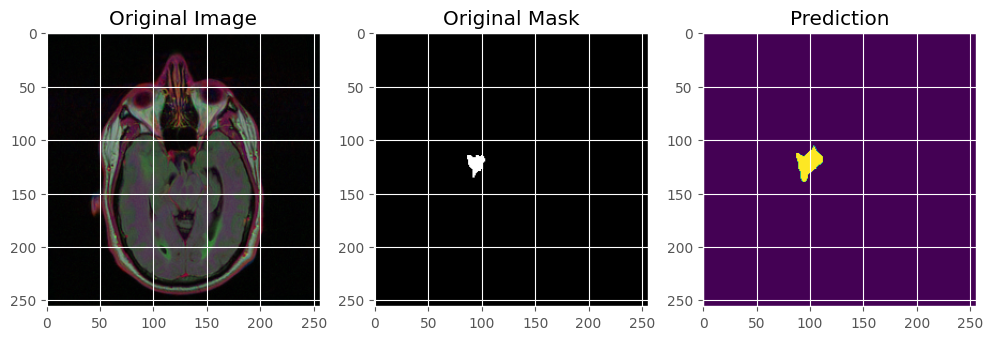

1/1 [==============================] - 0s 20ms/step


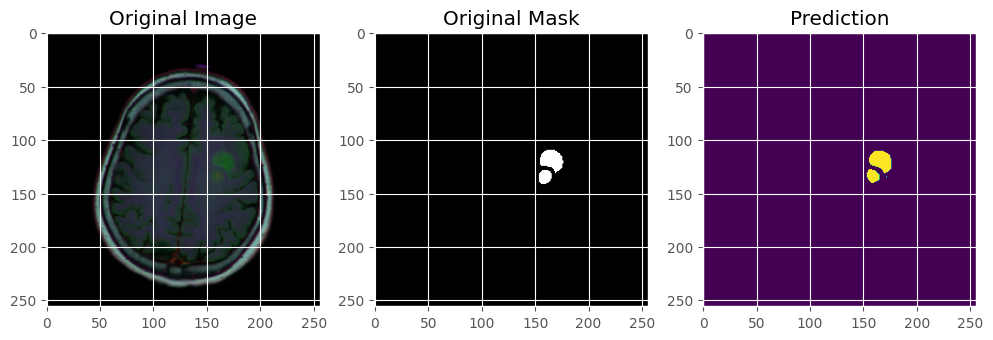

1/1 [==============================] - 0s 20ms/step


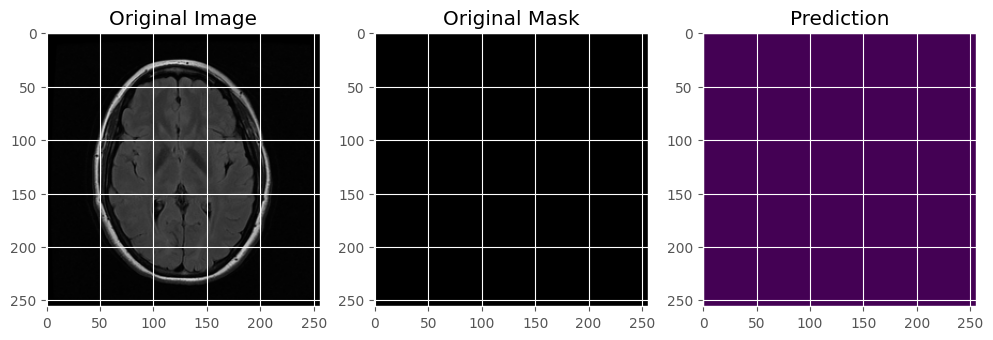

1/1 [==============================] - 0s 20ms/step


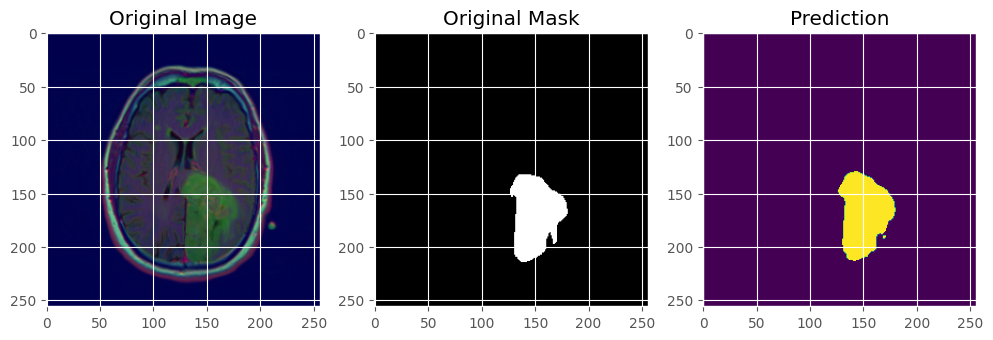

1/1 [==============================] - 0s 20ms/step


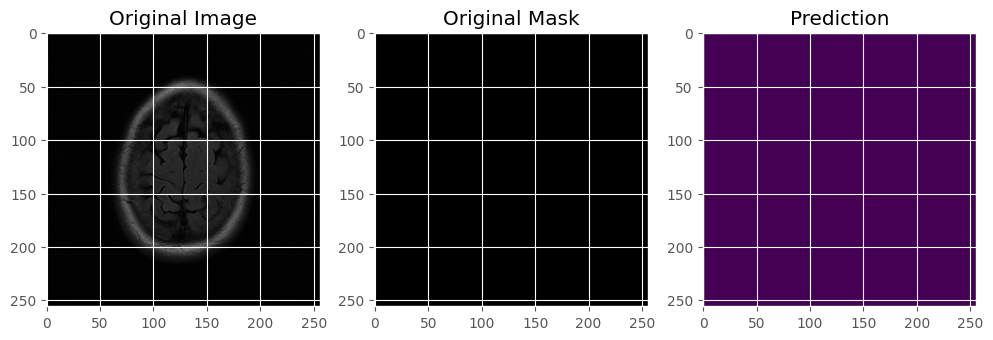

1/1 [==============================] - 0s 20ms/step


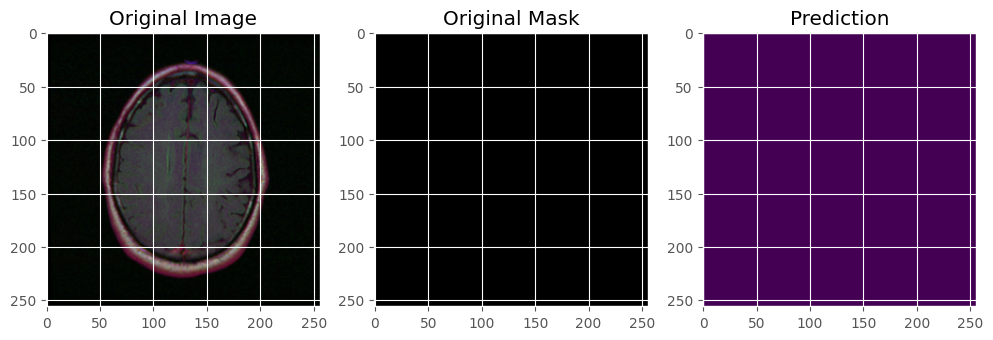

1/1 [==============================] - 0s 19ms/step


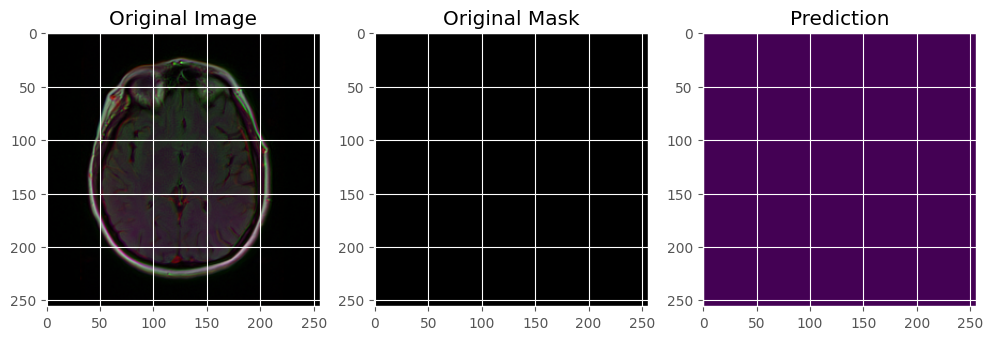

1/1 [==============================] - 0s 19ms/step


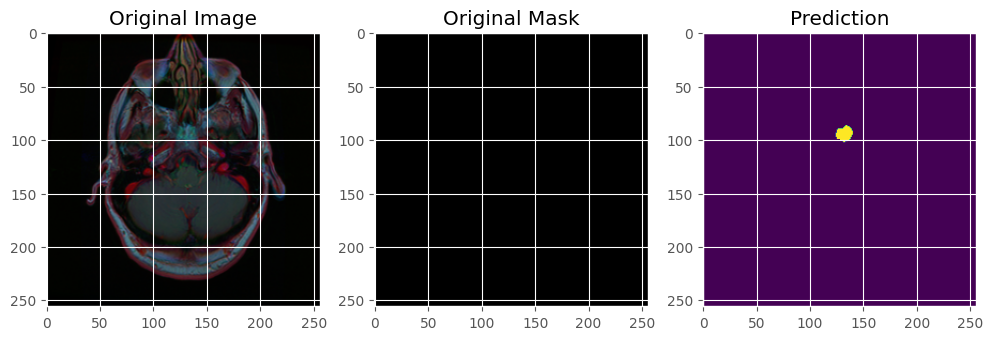

1/1 [==============================] - 0s 20ms/step


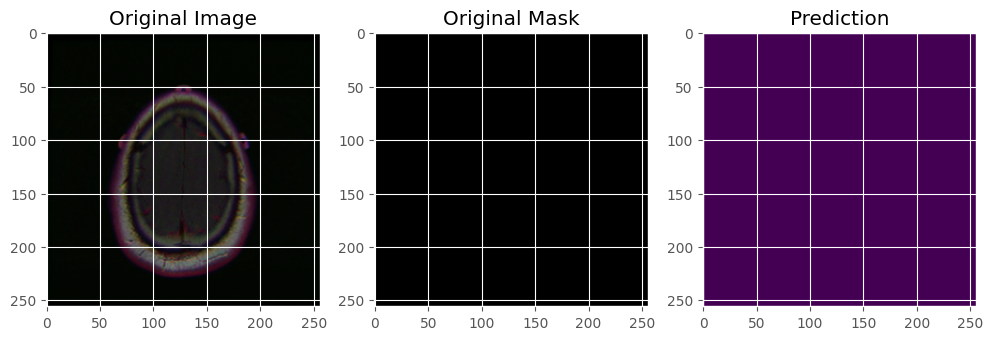

1/1 [==============================] - 0s 20ms/step


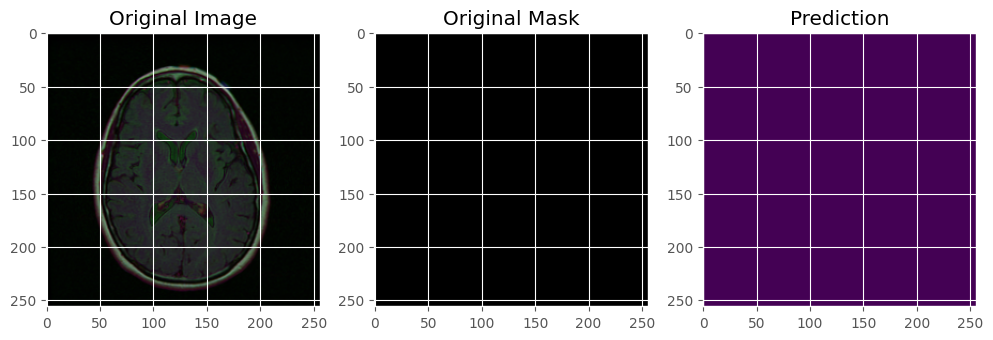

1/1 [==============================] - 0s 20ms/step


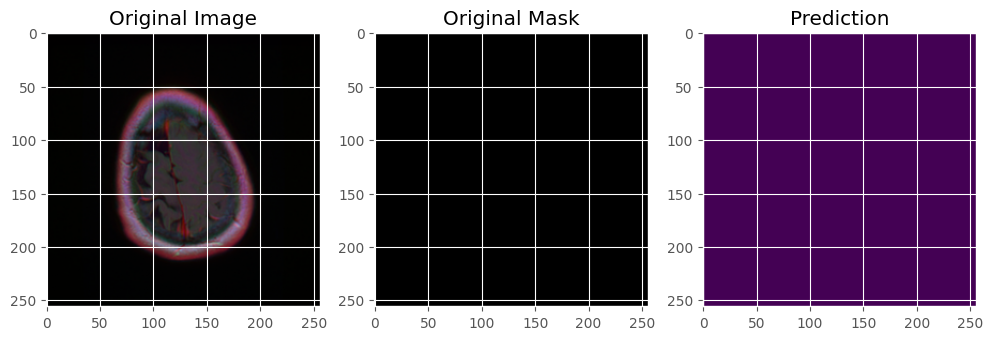

1/1 [==============================] - 0s 21ms/step


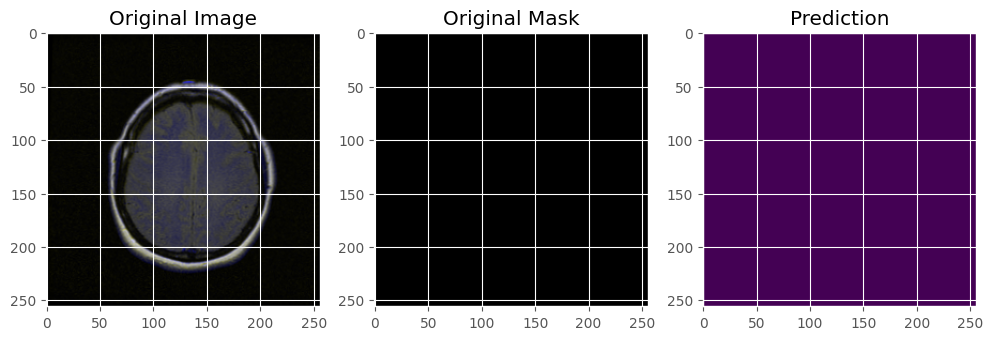

1/1 [==============================] - 0s 25ms/step


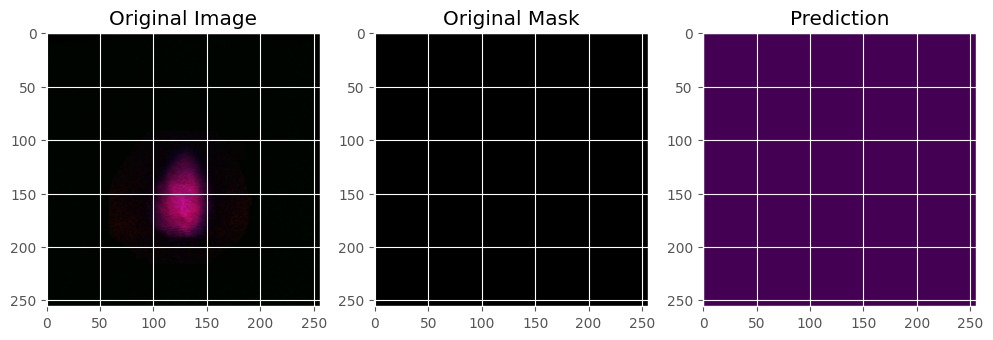

1/1 [==============================] - 0s 19ms/step


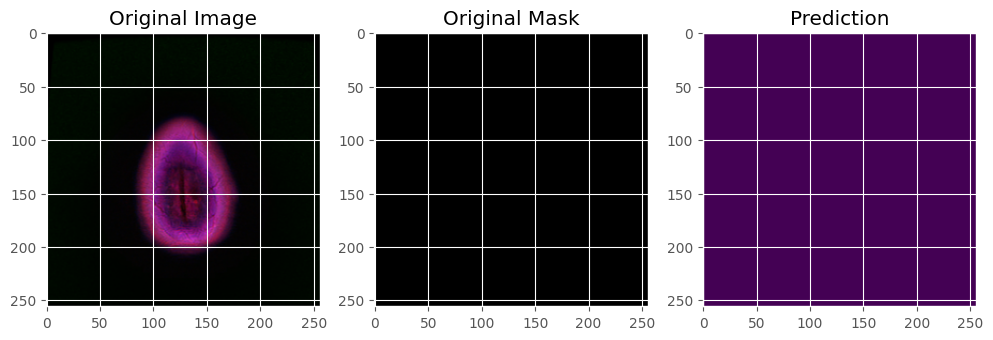

1/1 [==============================] - 0s 20ms/step


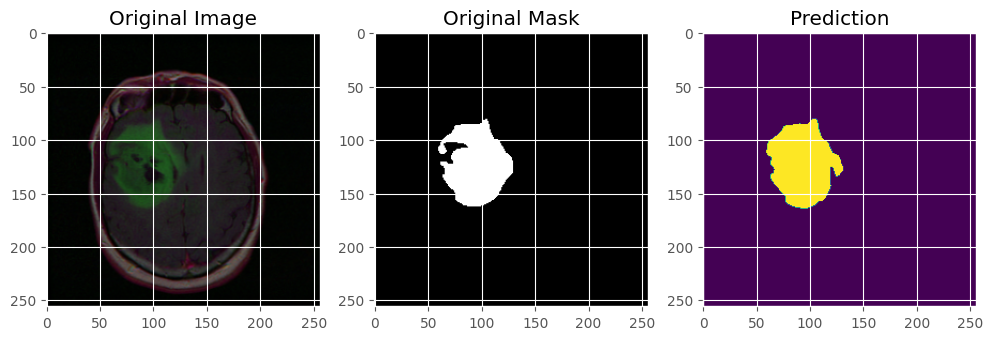

1/1 [==============================] - 0s 21ms/step


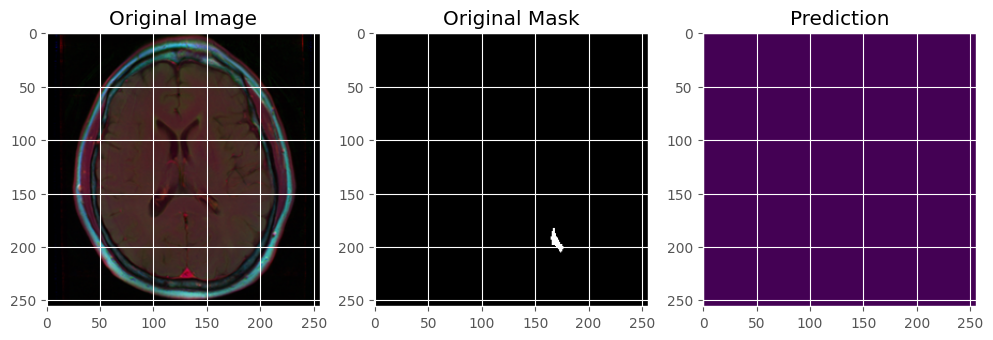

1/1 [==============================] - 0s 22ms/step


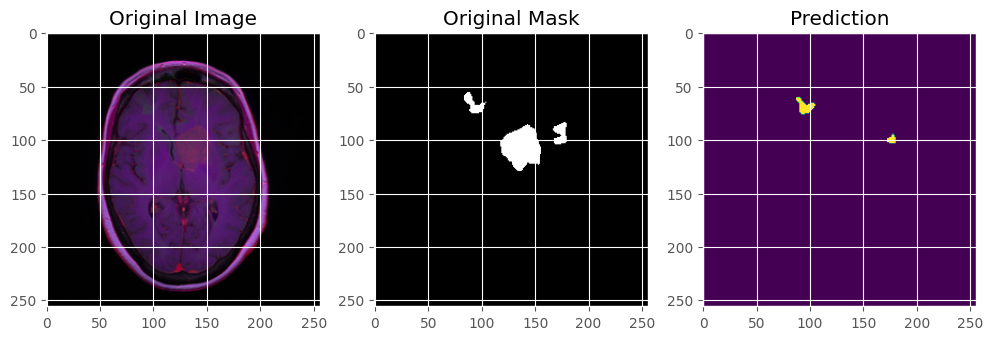

1/1 [==============================] - 0s 21ms/step


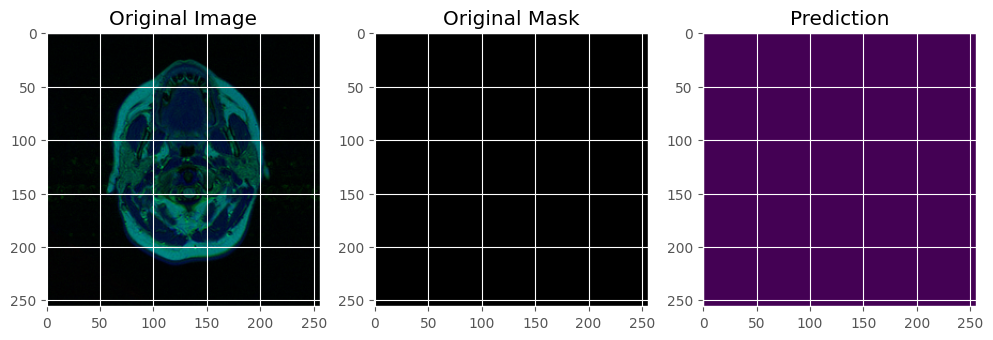

1/1 [==============================] - 0s 22ms/step


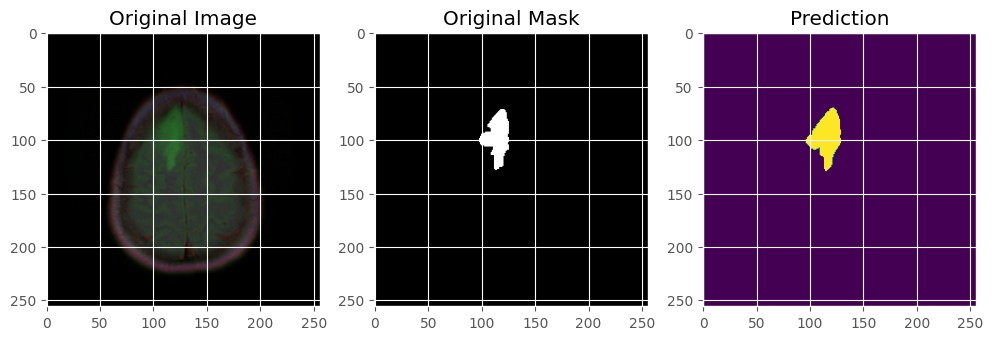

1/1 [==============================] - 0s 21ms/step


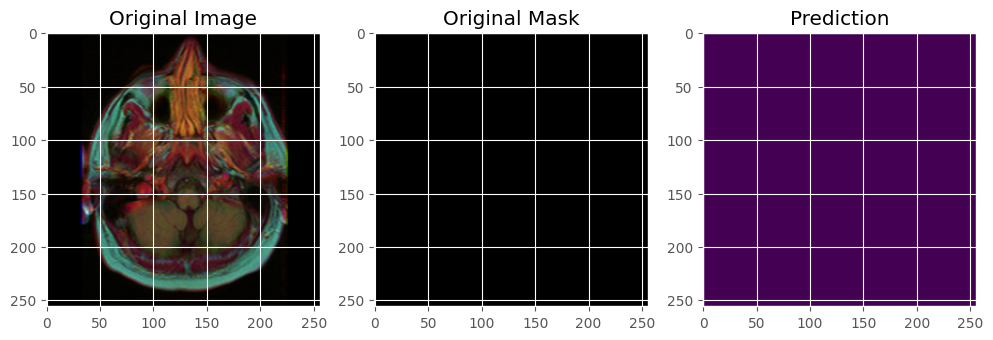

In [23]:
import numpy as np


for i in range(20):
    index = np.random.randint(1, len(df_test.index))
    img = cv2.imread(df_test['image_filenames_train'].iloc[index])
    img = cv2.resize(img, (im_height, im_width))
    img = img/255
    # print(imgs.shape) (256, 256 , 3)
    img = img[np.newaxis, :, :, : ]
    # print(img.shape) # (1, 256, 256, 3)

    predicted_img = model.predict(img)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(cv2.imread(df_test['mask'].iloc[index])))
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(predicted_img) > 0.5 )
    plt.title('Prediction')
    plt.show()